In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Loading Datasets

In [4]:
df = pd.read_csv('cancer-patient_datasets_Change.csv')
df.head()
#df.describe()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


### Specify the target variable and its distribution

In [5]:
target = df['Level']
#print(target)

### Split dataset into training and test data 

In [6]:
seed = 7
train_data, test_data = train_test_split(df, test_size=0.3, 
random_state= 7)

### Balance Split dataset into training and test data


In [7]:
seed = 7
train_data, test_data = train_test_split(df, test_size=0.3, 
random_state=seed, stratify=target)

### Separate the independent and target variables

In [8]:
# separate the independent and target variables from training data
train_x = train_data.drop(columns=['index','Patient Id','Level'],axis=1)
train_y = train_data['Level']
# separate the independent and target variables from test data
test_x = test_data.drop(columns=['index','Patient Id','Level'],axis=1)
test_y = test_data['Level']
test_x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
410,48,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
494,18,2,3,2,1,3,2,1,3,2,...,2,2,2,1,3,4,4,1,4,1
975,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
221,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
957,32,1,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,23,2,4,2,3,4,2,3,2,4,...,4,1,3,4,2,4,2,4,3,1
706,27,1,3,1,4,3,2,3,4,3,...,1,3,2,2,4,2,2,3,4,3
560,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
310,33,1,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4


### Normalization 

In [9]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#test_x = scaler.fit_transform(test_x)
#print(train_x)
#print(test_x)

### Standarization


In [10]:
"""
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
train_x = scaling.fit_transform(train_x)
test_x = scaling.fit_transform(test_x)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaling = StandardScaler()\ntrain_x = scaling.fit_transform(train_x)\ntest_x = scaling.fit_transform(test_x)\n'

### SVM 

In [11]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(train_x,train_y)

# make predictions on test data
svc_predict_test = svc_model.predict(test_x)
print('\nSVM Test Accuracy :', accuracy_score(test_y, svc_predict_test))
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("F1 Score:",metrics.f1_score(test_y, svc_predict_test))


SVM Test Accuracy : 0.9866666666666667
F1 Score: 0.990521327014218


In [12]:
#print(classification_report(test_y,svc_predict_test))

In [13]:
conf_matrix = confusion_matrix(test_y,svc_predict_test)
print(conf_matrix)

[[ 87   4]
 [  0 209]]


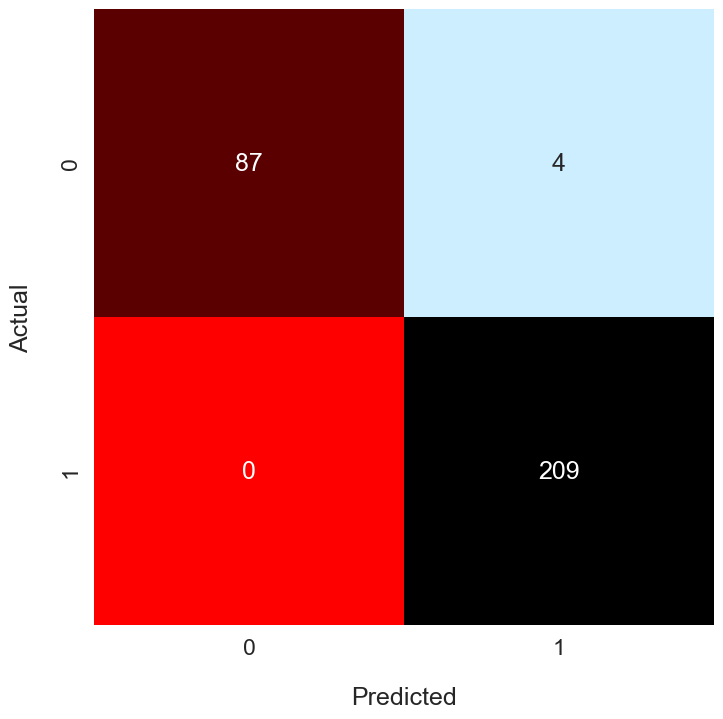

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

### Differents Type Of kernels

In [15]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=5, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

### Print F1Score Using Differents Kernels

In [24]:
 for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.30)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print("F1 Score:",metrics.f1_score(y_test,y_pred,average='macro'))
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
F1 Score: 0.9945419103313841
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.99      1.00       143

    accuracy                           1.00       210
   macro avg       0.99      1.00      0.99       210
weighted avg       1.00      1.00      1.00       210

Evaluation: RBF kernel
F1 Score: 0.9811889761428444
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.98      1.00      0.99       155

    accuracy                           0.99       210
   macro avg       0.99      0.97      0.98       210
weighted avg       0.99      0.99      0.99       210

Evaluation: Sigmoid kernel
F1 Score: 0.41666666666666663
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.71      1.00      0.83       150

    accuracy  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Use GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid','Linear']}

In [19]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=Linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=Linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=Linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=Linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=Linear; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=Linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=Linear; total time=   0.0s
[CV] END ...................

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'Linear']},
             verbose=2)

### Find the optimal parameters

In [20]:
print("Optimal HyperParameters:",grid.best_estimator_)

Optimal HyperParameters: SVC(C=0.1, gamma=1, kernel='poly')


### Print F1 Score Using Optimal HyperParameters 

In [23]:
grid_predictions = grid.predict(X_test)
print("Optimal F1 Score:",metrics.f1_score(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

Optimal F1 Score: 1.0
[[ 61   0]
 [  0 149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       149

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

